# DATA EXPLORATION

In [41]:
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
#import ydata_profiling
%matplotlib inline
from datetime import datetime
import seaborn as sns
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
sns.set_theme()



# Data Exploration

In [42]:
data = pd.read_parquet(Path("data") / "train.parquet")
data.head()

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude,log_bike_count
48321,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000
48324,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.693147
48327,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000
48330,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,1.609438
48333,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,2.302585


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496827 entries, 48321 to 929187
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_id                 496827 non-null  category      
 1   counter_name               496827 non-null  category      
 2   site_id                    496827 non-null  int64         
 3   site_name                  496827 non-null  category      
 4   bike_count                 496827 non-null  float64       
 5   date                       496827 non-null  datetime64[us]
 6   counter_installation_date  496827 non-null  datetime64[us]
 7   coordinates                496827 non-null  category      
 8   counter_technical_id       496827 non-null  category      
 9   latitude                   496827 non-null  float64       
 10  longitude                  496827 non-null  float64       
 11  log_bike_count             496827 non-null  float64  

In [44]:
#data.profile_report()

In [45]:
data.nunique(axis=0)

counter_id                     56
counter_name                   56
site_id                        30
site_name                      30
bike_count                    998
date                         8974
counter_installation_date      22
coordinates                    30
counter_technical_id           30
latitude                       30
longitude                      30
log_bike_count                998
dtype: int64

In [46]:
data.describe()

,site_id,bike_count,date,counter_installation_date,latitude,longitude,log_bike_count
count,4.968270e+05,496827.000000,496827,496827,496827.000000,496827.000000,496827.000000
mean,1.053450e+08,60.191475,2021-03-08 07:25:59.668858,2019-04-04 07:24:35.245911,48.854343,2.345479,3.079917
min,1.000070e+08,0.000000,2020-09-01 01:00:00,2013-01-18 00:00:00,48.826360,2.265420,0.000000
25%,1.000475e+08,5.000000,2020-12-05 22:00:00,2018-11-29 00:00:00,48.840801,2.314440,1.791759
50%,1.000562e+08,29.000000,2021-03-08 11:00:00,2019-11-06 00:00:00,48.852090,2.353870,3.401197
75%,1.000563e+08,79.000000,2021-06-09 14:00:00,2019-12-11 00:00:00,48.864610,2.375870,4.382027
max,3.000147e+08,1302.000000,2021-09-09 23:00:00,2020-11-29 00:00:00,48.891720,2.409690,7.172425
std,3.210346e+07,87.590566,NaN,NaN,0.018554,0.038026,1.659899


In [47]:
data.sort_values(by="date")
data["day"] = data["date"].dt.date
data["month"] = data["date"].dt.to_period("M")
daily_counts_days = data.groupby("day")["bike_count"].sum().reset_index()
daily_counts_months = data.groupby("month")["bike_count"].sum().reset_index()
daily_counts_months["month"] = daily_counts_months["month"].dt.to_timestamp()

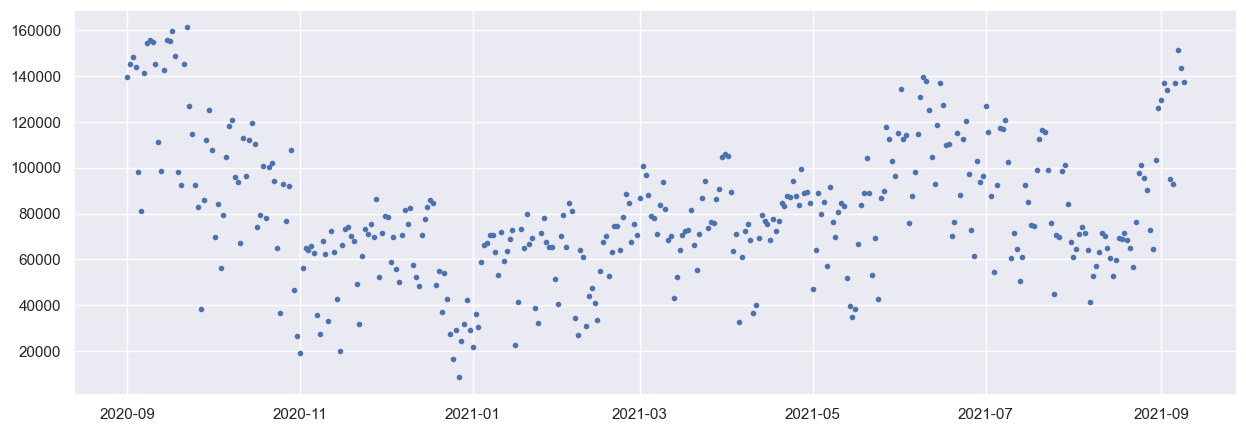

In [48]:
plt.figure(figsize=(15, 5))
plt.plot(daily_counts_days["day"], daily_counts_days["bike_count"], ".")

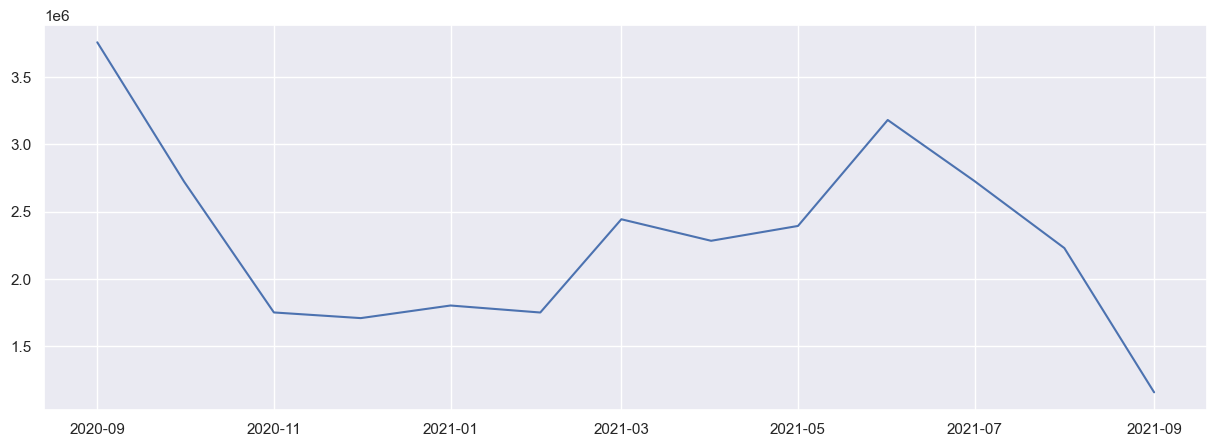

In [49]:
plt.figure(figsize=(15, 5))
plt.plot(daily_counts_months["month"], daily_counts_months["bike_count"])

In [50]:
pd.crosstab(index=data["counter_name"], columns=data["counter_id"])

counter_id,100007049-101007049,100007049-102007049,100036718-103036718,100036718-104036718,100036719-103036719,100036719-104036719,100042374-109042374,100042374-110042374,100044493-SC,100047542-103047542,...,100057380-103057380,100057380-104057380,100057445-103057445,100057445-104057445,100060178-101060178,100060178-102060178,100063175-353277233,100063175-353277235,300014702-353245971,300014702-353245972
counter_name,,,,,,,,,,,,,,,,,,,,,
152 boulevard du Montparnasse E-O,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152 boulevard du Montparnasse O-E,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18 quai de l'Hôtel de Ville NO-SE,0,0,0,0,0,8974,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18 quai de l'Hôtel de Ville SE-NO,0,0,0,0,8974,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20 Avenue de Clichy NO-SE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8974,0,0,0
20 Avenue de Clichy SE-NO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8974,0,0
254 rue de Vaugirard NE-SO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6577
254 rue de Vaugirard SO-NE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6577,0
27 quai de la Tournelle NO-SE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
(data.groupby(["site_name"])["bike_count"].sum().sort_values(ascending=True).to_frame())

C:\Users\comem\AppData\Local\Temp\ipykernel_15452\627690864.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (data.groupby(["site_name"])["bike_count"].sum().sort_values(ascending=True).to_frame())


,bike_count
site_name,
Face au 40 quai D'Issy,127507.0
Pont des Invalides N-S,187174.0
Pont des Invalides S-N,228124.0
28 boulevard Diderot,391000.0
Face au 8 avenue de la porte de Charenton,420003.0
Face au 4 avenue de la porte de Bagnolet,504235.0
Face 104 rue d'Aubervilliers,537046.0
18 quai de l'Hôtel de Ville,549723.0
Pont Charles De Gaulle,584323.0


# Data Distribution

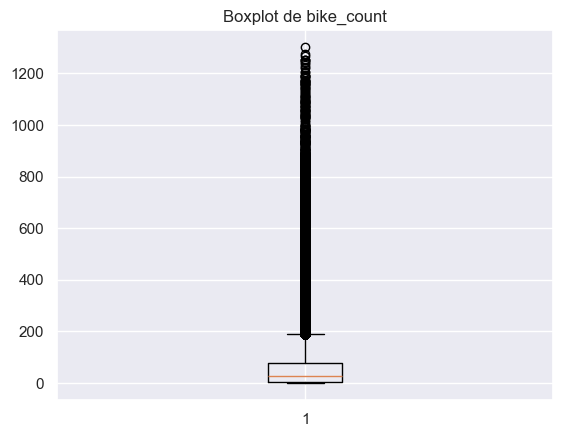

In [52]:
plt.boxplot(data["bike_count"])
plt.title("Boxplot de bike_count")
plt.show()

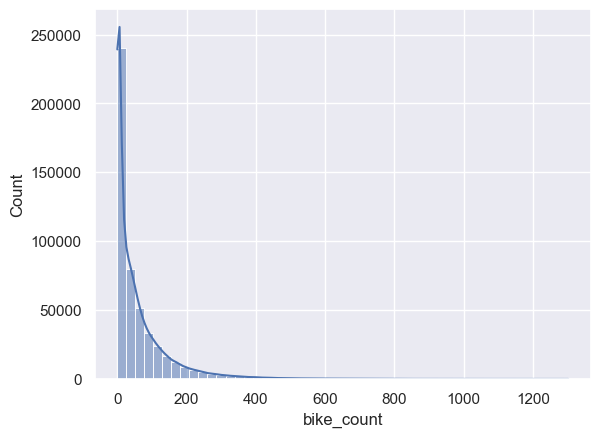

In [53]:
ax = sns.histplot(data, x="bike_count", kde=True, bins=50)

In [54]:
(data["bike_count"] > 400).sum() / len(data)

np.float64(0.011116545598367238)

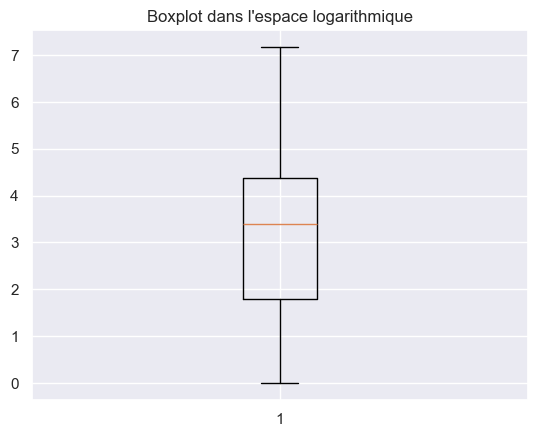

In [55]:
plt.boxplot(data["log_bike_count"])
plt.title("Boxplot dans l'espace logarithmique")
plt.show()

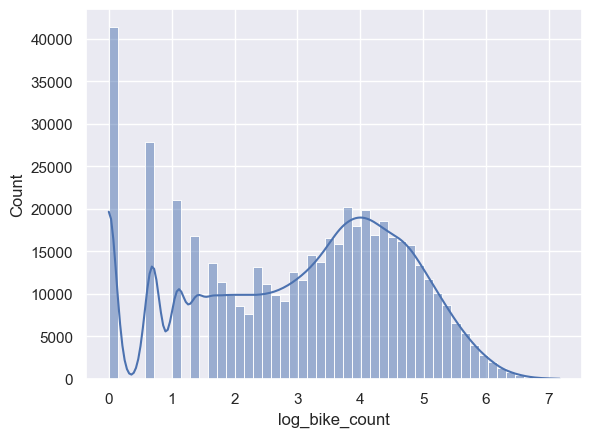

In [56]:
ax = sns.histplot(data, x="log_bike_count", kde=True, bins=50)

# Data Processing

### Process dates

In [57]:
def _encode_dates(X):
    X = X.copy()  # modify a copy of X
    # Encode the date information from the DateOfDeparture columns
    X.loc[:, "year"] = X["date"].dt.year
    X.loc[:, "month"] = X["date"].dt.month
    X.loc[:, "week_number"] = X["date"].dt.isocalendar().week
    X.loc[:, "day"] = X["date"].dt.day
    X.loc[:, "weekday"] = X["date"].dt.weekday
    X.loc[:, "weekend?"] = X["date"].dt.weekday.isin([5, 6]).astype(int)
    X.loc[:, "hour"] = X["date"].dt.hour
    X.loc[:, "dayofyear"] = X["date"].dt.dayofyear  # Add the day of the year

    # Finally we can drop the original columns from the dataframe
    return X

In [58]:
def get_time_of_day(hour):
    if hour > 3 and hour <= 6:
        return 1
    if hour > 6 and hour <= 9:
        return 2
    elif hour > 9 and hour <= 12:
        return 3
    elif hour > 12 and hour <= 17:
        return 4
    elif hour > 17 and hour <= 22:
        return 5
    else:
        return 6

In [59]:
def get_season(date):
    if (date > datetime(2020, 9, 21)) & (date < datetime(2020, 12, 21)):
        return 1
    if (date > datetime(2020, 12, 20)) & (date < datetime(2021, 3, 20)):
        return 2
    if (date > datetime(2021, 3, 19)) & (date < datetime(2021, 6, 21)):
        return 3
    if ((date > datetime(2021, 6, 20)) & (date < datetime(2021, 9, 22))) | (
        (date > datetime(2020, 6, 19)) & (date < datetime(2020, 9, 22))
    ):
        return 4

In [60]:
data = pd.read_parquet(Path("data") / "train.parquet")
data = _encode_dates(data)
data["time_of_day"] = data["hour"].apply(get_time_of_day)
data["season"] = data["date"].apply(get_season)
data

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,coordinates,counter_technical_id,latitude,...,year,month,week_number,day,weekday,weekend?,hour,dayofyear,time_of_day,season
48321,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,2020,9,36,1,1,0,2,245,6,4
48324,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,2020,9,36,1,1,0,3,245,6,4
48327,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,2020,9,36,1,1,0,4,245,1,4
48330,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,2020,9,36,1,1,0,15,245,4,4
48333,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,2020,9,36,1,1,0,18,245,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929175,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,445.0,2021-09-09 06:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.839770,...,2021,9,36,9,3,0,6,252,1,4
929178,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,145.0,2021-09-09 10:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.839770,...,2021,9,36,9,3,0,10,252,3,4
929181,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,218.0,2021-09-09 15:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.839770,...,2021,9,36,9,3,0,15,252,4,4
929184,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,21.0,2021-09-09 22:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.839770,...,2021,9,36,9,3,0,22,252,5,4


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496827 entries, 48321 to 929187
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_id                 496827 non-null  category      
 1   counter_name               496827 non-null  category      
 2   site_id                    496827 non-null  int64         
 3   site_name                  496827 non-null  category      
 4   bike_count                 496827 non-null  float64       
 5   date                       496827 non-null  datetime64[us]
 6   counter_installation_date  496827 non-null  datetime64[us]
 7   coordinates                496827 non-null  category      
 8   counter_technical_id       496827 non-null  category      
 9   latitude                   496827 non-null  float64       
 10  longitude                  496827 non-null  float64       
 11  log_bike_count             496827 non-null  float64  

In [62]:
data["site_id"] = data["site_id"].astype("category")  # Convert in category
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496827 entries, 48321 to 929187
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_id                 496827 non-null  category      
 1   counter_name               496827 non-null  category      
 2   site_id                    496827 non-null  category      
 3   site_name                  496827 non-null  category      
 4   bike_count                 496827 non-null  float64       
 5   date                       496827 non-null  datetime64[us]
 6   counter_installation_date  496827 non-null  datetime64[us]
 7   coordinates                496827 non-null  category      
 8   counter_technical_id       496827 non-null  category      
 9   latitude                   496827 non-null  float64       
 10  longitude                  496827 non-null  float64       
 11  log_bike_count             496827 non-null  float64  

### Process calendar information : holidays and covid

In [63]:
def _add_holiday(X):
    link_bank_holiday = (
        "https://www.data.gouv.fr/fr/datasets/r/6637991e-c4d8-4cd6-854e-ce33c5ab49d5"
    )
    link_vacance_scolaire = (
        "https://www.data.gouv.fr/fr/datasets/r/9957d723-346e-4317-8cb3-293c94e19b2d"
    )
    start_calendar = np.min(X["date"])
    end_calendar = np.max(X["date"])
    df_bank_holiday = pd.read_csv(link_bank_holiday)
    df_bank_holiday["date"] = pd.to_datetime(df_bank_holiday["date"]).dt.date

    df_holidays = pd.read_csv(link_vacance_scolaire, sep=";")
    df_holidays = df_holidays[df_holidays["Zones"].isin(["Zone C"])]
    df_holidays = df_holidays.drop_duplicates(
        subset=["Zones", "Description", "annee_scolaire"]
    )

    df_holidays["Date de début"] = pd.to_datetime(
        df_holidays["Date de début"].str[0:10]
    )
    df_holidays["Date de fin"] = pd.to_datetime(df_holidays["Date de fin"].str[0:10])

    df_calendar = pd.DataFrame(
        index=pd.date_range(start=start_calendar, end=end_calendar)
    )
    df_calendar["date"] = df_calendar.index.date
    df_calendar["is_bank_holiday"] = 0
    df_calendar.loc[
        df_calendar["date"].isin(df_bank_holiday["date"]), "is_bank_holiday"
    ] = 1

    df_calendar["is_holidays"] = 0
    for _, row in df_holidays.iterrows():
        date_start = row["Date de début"].date()
        date_end = row["Date de fin"].date()
        df_calendar.loc[
            (df_calendar["date"] >= date_start) & (df_calendar["date"] <= date_end),
            "is_holidays",
        ] = 1

    X = X.copy()
    X["date"] = X["date"].astype("datetime64[ns]")
    df_calendar["date"] = df_calendar["date"].astype("datetime64[ns]")

    X["orig_index"] = np.arange(X.shape[0])
    X = pd.merge_asof(
        X.sort_values("date"),
        df_calendar[["date", "is_holidays", "is_bank_holiday"]].sort_values("date"),
        on="date",
    )
    # Sort back to the original order
    X = X.sort_values("orig_index")
    del X["orig_index"]
    return X

In [64]:
def _add_covid(X):
    start_calendar = np.min(X["date"])
    end_calendar = np.max(X["date"])

    df_calendar = pd.DataFrame(
        index=pd.date_range(start=start_calendar, end=end_calendar)
    )

    df_calendar["date"] = df_calendar.index.date

    df_calendar["is_lockdown"] = 0

    date_start_1 = pd.to_datetime("2020-10-30").date()
    date_end_1 = pd.to_datetime("2020-12-15").date()

    df_calendar.loc[
        (df_calendar["date"] >= date_start_1) & (df_calendar["date"] <= date_end_1),
        "is_lockdown",
    ] = 1

    date_start_2 = pd.to_datetime("2021-04-03").date()
    date_end_2 = pd.to_datetime("2021-05-09").date()

    df_calendar.loc[
        (df_calendar["date"] >= date_start_2) & (df_calendar["date"] <= date_end_2),
        "is_lockdown",
    ] = 1

    X = X.copy()
    X["date"] = X["date"].astype("datetime64[ns]")
    df_calendar["date"] = df_calendar["date"].astype("datetime64[ns]")

    X["orig_index"] = np.arange(X.shape[0])
    X = pd.merge_asof(
        X.sort_values("date"),
        df_calendar[["date", "is_lockdown"]].sort_values("date"),
        on="date",
    )
    # Sort back to the original order
    X = X.sort_values("orig_index")
    del X["orig_index"]
    return X

In [65]:
data = _add_covid(data)
data = _add_holiday(data)
data

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,coordinates,counter_technical_id,latitude,...,day,weekday,weekend?,hour,dayofyear,time_of_day,season,is_lockdown,is_holidays,is_bank_holiday
107,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,1,1,0,2,245,6,4,0,0,0
153,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,1,1,0,3,245,6,4,0,0,0
201,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,1,1,0,4,245,1,4,0,0,0
782,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,1,1,0,15,245,4,4,0,0,0
925,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,1,1,0,18,245,5,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495819,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,445.0,2021-09-09 06:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.839770,...,9,3,0,6,252,1,4,0,0,0
496091,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,145.0,2021-09-09 10:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.839770,...,9,3,0,10,252,3,4,0,0,0
496354,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,218.0,2021-09-09 15:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.839770,...,9,3,0,15,252,4,4,0,0,0
496719,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,21.0,2021-09-09 22:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.839770,...,9,3,0,22,252,5,4,0,0,0


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496827 entries, 107 to 496826
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_id                 496827 non-null  category      
 1   counter_name               496827 non-null  category      
 2   site_id                    496827 non-null  category      
 3   site_name                  496827 non-null  category      
 4   bike_count                 496827 non-null  float64       
 5   date                       496827 non-null  datetime64[ns]
 6   counter_installation_date  496827 non-null  datetime64[us]
 7   coordinates                496827 non-null  category      
 8   counter_technical_id       496827 non-null  category      
 9   latitude                   496827 non-null  float64       
 10  longitude                  496827 non-null  float64       
 11  log_bike_count             496827 non-null  float64    

### Process weather information

In [67]:
def _merge_external_data(X):
    df_ext = pd.read_csv(
        "external_data/external_data_cleaned.csv", parse_dates=["date"]
    )

    X = X.copy()

    X["date"] = X["date"].astype("datetime64[ns]")
    df_ext["date"] = df_ext["date"].astype("datetime64[ns]")

    # When using merge_asof left frame need to be sorted
    X["orig_index"] = np.arange(X.shape[0])
    X = pd.merge_asof(
        X.sort_values("date"),
        df_ext.sort_values("date"),
        on="date",
    )
    # Sort back to the original order
    X = X.sort_values("orig_index")
    del X["orig_index"]
    return X

In [68]:
data = _merge_external_data(data)
data

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,coordinates,counter_technical_id,latitude,...,ssfrai,etat_sol,ht_neige,ww description,n,nbas,hbas,t,td,tend24
107,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,0.0,0.0,0.0,Clouds generally dissolving or becoming less d...,0.0,0.0,1750.0,285.75,282.55,120.0
153,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,0.0,0.0,0.0,State of sky on the whole unchanged,0.0,0.0,1750.0,283.95,282.05,0.0
201,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,0.0,0.0,0.0,State of sky on the whole unchanged,0.0,0.0,1750.0,283.95,282.05,0.0
782,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,0.0,0.0,0.0,Clouds generally forming or developing,60.0,5.0,1750.0,293.65,279.95,-260.0
925,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,0.0,0.0,0.0,State of sky on the whole unchanged,90.0,7.0,1750.0,292.15,280.55,-210.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495819,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,445.0,2021-09-09 06:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.839770,...,0.0,1.0,0.0,Mist,100.0,8.0,150.0,292.85,292.05,-230.0
496091,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,145.0,2021-09-09 10:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.839770,...,0.0,0.0,0.0,State of sky on the whole unchanged,100.0,8.0,250.0,293.45,291.95,-80.0
496354,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,218.0,2021-09-09 15:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.839770,...,0.0,0.0,0.0,State of sky on the whole unchanged,75.0,5.0,1250.0,299.35,288.45,80.0
496719,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,21.0,2021-09-09 22:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.839770,...,0.0,1.0,0.0,Clouds generally forming or developing,50.0,3.0,2900.0,292.25,290.75,140.0


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496827 entries, 107 to 496826
Data columns (total 48 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_id                 496827 non-null  category      
 1   counter_name               496827 non-null  category      
 2   site_id                    496827 non-null  category      
 3   site_name                  496827 non-null  category      
 4   bike_count                 496827 non-null  float64       
 5   date                       496827 non-null  datetime64[ns]
 6   counter_installation_date  496827 non-null  datetime64[us]
 7   coordinates                496827 non-null  category      
 8   counter_technical_id       496827 non-null  category      
 9   latitude                   496827 non-null  float64       
 10  longitude                  496827 non-null  float64       
 11  log_bike_count             496827 non-null  float64    

### Process Geographic information

In [70]:
def add_arrondissement_with_geopandas(X, shapefile_path):
    arrondissements = gpd.read_file(shapefile_path)

    X = X.copy()
    X["geometry"] = X.apply(
        lambda row: Point(row["longitude"], row["latitude"]), axis=1
    )
    gdf = gpd.GeoDataFrame(X, geometry="geometry", crs=arrondissements.crs)

    merged = gpd.sjoin(gdf, arrondissements, how="left", predicate="within")

    X["district"] = merged["c_ar"].fillna(21).astype(int)

    return X

In [71]:
shapefile_path = "external_data/arrondissements.shp"
data = add_arrondissement_with_geopandas(data, shapefile_path)
data

DataSourceError: Unable to open external_data/arrondissements.shx or external_data/arrondissements.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496827 entries, 107 to 496826
Data columns (total 50 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_id                 496827 non-null  category      
 1   counter_name               496827 non-null  category      
 2   site_id                    496827 non-null  category      
 3   site_name                  496827 non-null  category      
 4   bike_count                 496827 non-null  float64       
 5   date                       496827 non-null  datetime64[ns]
 6   counter_installation_date  496827 non-null  datetime64[us]
 7   coordinates                496827 non-null  category      
 8   counter_technical_id       496827 non-null  category      
 9   latitude                   496827 non-null  float64       
 10  longitude                  496827 non-null  float64       
 11  log_bike_count             496827 non-null  float64    

# Linear test

In [ ]:
df = data.copy().drop("bike_count", axis=1)

In [ ]:
def train_test_split_temporal(X, y, delta_threshold="30 days"):

    cutoff_date = X["date"].max() - pd.Timedelta(delta_threshold)
    mask = X["date"] <= cutoff_date
    X_train, X_valid = X.loc[mask], X.loc[~mask]
    y_train, y_valid = y[mask], y[~mask]

    return X_train, y_train, X_valid, y_valid

In [ ]:
X_train, y_train, X_valid, y_valid = train_test_split_temporal(
    df.drop("log_bike_count", axis=1), df["log_bike_count"]
)

print(
    f'Train: n_samples={X_train.shape[0]},  {X_train["date"].min()} to {X_train["date"].max()}'
)
print(
    f'Valid: n_samples={X_valid.shape[0]},  {X_valid["date"].min()} to {X_valid["date"].max()}'
)

Train: n_samples=456507,  2020-09-01 01:00:00 to 2021-08-10 23:00:00
Valid: n_samples=40320,  2021-08-11 00:00:00 to 2021-09-09 23:00:00


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error

data_num = X_train.select_dtypes(include=["int", "float"])
data_cat = X_train.drop(["date", "geometry"], axis=1).select_dtypes(
    exclude=["int", "float"]
)

categorical_encoder = OneHotEncoder(handle_unknown="ignore")
categorical_cols = data_cat.columns

numerical_scaler = StandardScaler()
numerical_cols = data_num.columns

preprocessor = ColumnTransformer(
    [
        ("cat", categorical_encoder, categorical_cols),
        ("num", numerical_scaler, numerical_cols),
    ]
)

regressor = Ridge()

pipe = make_pipeline(preprocessor, regressor)
pipe.fit(X_train, y_train)


print(f"Train set, RMSE={root_mean_squared_error(y_train, pipe.predict(X_train)):.5f}")
print(f"Valid set, RMSE={root_mean_squared_error(y_valid, pipe.predict(X_valid)):.5f}")

Train set, RMSE=1.08686
Valid set, RMSE=0.86092


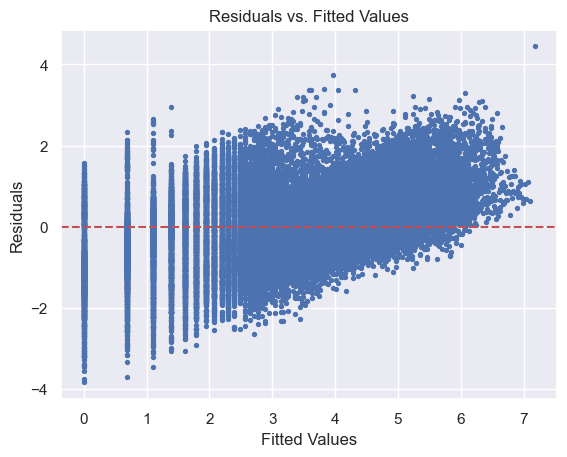

In [ ]:
residuals = y_valid - pipe.predict(X_valid)

# Residuals vs. Fitted Values Plot
plt.scatter(y_valid, residuals, s=8)
plt.axhline(y=0, color="r", linestyle="--")
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

# Feature Selection

### Select KBest

In [ ]:
df = data.copy().drop("bike_count", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496827 entries, 107 to 496826
Data columns (total 49 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_id                 496827 non-null  category      
 1   counter_name               496827 non-null  category      
 2   site_id                    496827 non-null  category      
 3   site_name                  496827 non-null  category      
 4   date                       496827 non-null  datetime64[ns]
 5   counter_installation_date  496827 non-null  datetime64[us]
 6   coordinates                496827 non-null  category      
 7   counter_technical_id       496827 non-null  category      
 8   latitude                   496827 non-null  float64       
 9   longitude                  496827 non-null  float64       
 10  log_bike_count             496827 non-null  float64       
 11  year                       496827 non-null  int32      

In [ ]:
X_train, y_train, X_valid, y_valid = train_test_split_temporal(
    df.drop("log_bike_count", axis=1), df["log_bike_count"]
)

print(
    f'Train: n_samples={X_train.shape[0]},  {X_train["date"].min()} to {X_train["date"].max()}'
)
print(
    f'Valid: n_samples={X_valid.shape[0]},  {X_valid["date"].min()} to {X_valid["date"].max()}'
)

Train: n_samples=456507,  2020-09-01 01:00:00 to 2021-08-10 23:00:00
Valid: n_samples=40320,  2021-08-11 00:00:00 to 2021-09-09 23:00:00


In [ ]:
X_train_num = X_train.select_dtypes(include=["int", "float"])

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression


def SelectKBest_mutual(X, y, k):
    """
    Perform feature selection using SelectKBest with mutual information regression.

    Parameters:
        X (DataFrame): Independent variables.
        y (Series): Dependent variable.
        k (int): Number of top features to select.

    Returns:
        DataFrame: Comparative table showing the statistical significance of features.
    """
    # Initialize SelectKBest with mutual information regression
    selector = SelectKBest(score_func=mutual_info_regression, k=k)

    # Fit selector to data
    selector.fit(X, y)

    # Get selected feature indices
    selected_indices = selector.get_support(indices=True)

    # Get names of selected features
    selected_features = X.columns[selected_indices]

    # Get feature scores
    scores = selector.scores_[selected_indices]

    # Create a comparative table
    feature_table = pd.DataFrame({"Feature": selected_features, "Score": scores})
    feature_table = feature_table.sort_values(by="Score", ascending=False).reset_index(
        drop=True
    )

    return feature_table


# Apply the function
best_20 = SelectKBest_mutual(X_train_num, y_train, 20)

best_20

,Feature,Score
0,hour,0.417117
1,time_of_day,0.333528
2,vv,0.174344
3,latitude,0.162468
4,longitude,0.161277
5,district,0.107779
6,t,0.104819
7,pres,0.094134
8,tend24,0.071776
9,td,0.067473


### RFECV

In [ ]:
df = data.copy().drop("bike_count", axis=1)
df = df.copy().drop(
    [
        "counter_id",
        "site_id",
        "site_name",
        "coordinates",
        "counter_technical_id",
        "geometry",
        "ww description",
        "date",
    ],
    axis=1,
)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496827 entries, 107 to 496826
Data columns (total 41 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_name               496827 non-null  category      
 1   counter_installation_date  496827 non-null  datetime64[us]
 2   latitude                   496827 non-null  float64       
 3   longitude                  496827 non-null  float64       
 4   log_bike_count             496827 non-null  float64       
 5   year                       496827 non-null  int32         
 6   month                      496827 non-null  int32         
 7   week_number                496827 non-null  UInt32        
 8   day                        496827 non-null  int32         
 9   weekday                    496827 non-null  int32         
 10  weekend?                   496827 non-null  int64         
 11  hour                       496827 non-null  int32      

In [ ]:
week_num_sample = [i for i in range(2, 56, 4)]

# Create a boolean mask for rows to keep in the DataFrame
df_sample = df[df["week_number"].isin(week_num_sample)]
y_sample = df_sample["log_bike_count"]
X_sample = df_sample.drop(columns="log_bike_count", axis=1)

In [ ]:
X_sample_num = X_sample.select_dtypes(include=["int", "float"])
X_sample_num = X_sample_num.drop(
    ["weekend?", "is_lockdown", "is_holidays", "is_bank_holiday"], axis=1
)
X_sample_num.columns
X_sample_cat = X_sample.select_dtypes(exclude=["int", "float"])

ordinal_cols = ["counter_installation_date"]
onehot_cols = ["counter_name"]
scale_cols = X_sample_num.columns

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

scaler = StandardScaler()
onehot = OneHotEncoder(sparse_output=False)
ordinal = OrdinalEncoder()

X_sample[scale_cols] = scaler.fit_transform(X_sample[scale_cols])

onehot_encoded = onehot.fit_transform(X_sample[onehot_cols])
onehot_columns = onehot.get_feature_names_out(onehot_cols)
X_sample_onehot = pd.DataFrame(
    onehot_encoded, columns=onehot_columns, index=X_sample.index
)
X_sample = X_sample.drop(columns=onehot_cols)
X_sample = pd.concat([X_sample, X_sample_onehot], axis=1)

X_sample[ordinal_cols] = ordinal.fit_transform(X_sample[ordinal_cols])

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import TimeSeriesSplit

estimator = XGBRegressor(random_state=2512)

# Set the minimum number of features to be selected
min_features_to_select = 1

# Set the cross-validation splitting strategy
cv = TimeSeriesSplit(5)

# Create a RFECV object using the estimator
rfecv = RFECV(estimator, min_features_to_select=min_features_to_select, cv=cv)

# Fit the data
rfecv.fit(X_sample, y_sample)

# Get integer index of the features selected
feature_index = rfecv.get_support(indices=True)

# Get a mask of the features selected
feature_mask = rfecv.support_

# Get selected feature names
feature_names = rfecv.get_feature_names_out()

# Get the number of features retained
feature_number = rfecv.n_features_

# Get results
results = pd.DataFrame(rfecv.cv_results_)

# Get RFECV score
rfecv_score = rfecv.score(X_sample, y_sample)

# Print feature number, names and score
print("Original feature number:", len(X_sample.columns))
print("Optimal feature number:", feature_number)
print("Selected features:", feature_names)
print("Score:", rfecv_score)

Original feature number: 95
Optimal feature number: 79
Selected features: ['counter_installation_date' 'latitude' 'longitude' 'year' 'month'
 'week_number' 'day' 'weekday' 'hour' 'dayofyear' 'time_of_day' 'season'
 'is_lockdown' 'is_holidays' 'is_bank_holiday' 'pres' 'u' 'tend' 'ww'
 'rr6' 'rr12' 'rr24' 'etat_sol' 'ht_neige' 'n' 't' 'td' 'tend24'
 'district' 'counter_name_152 boulevard du Montparnasse E-O'
 'counter_name_152 boulevard du Montparnasse O-E'
 "counter_name_18 quai de l'Hôtel de Ville NO-SE"
 "counter_name_18 quai de l'Hôtel de Ville SE-NO"
 'counter_name_20 Avenue de Clichy NO-SE'
 'counter_name_20 Avenue de Clichy SE-NO'
 'counter_name_254 rue de Vaugirard NE-SO'
 'counter_name_254 rue de Vaugirard SO-NE'
 'counter_name_27 quai de la Tournelle NO-SE'
 'counter_name_27 quai de la Tournelle SE-NO'
 'counter_name_28 boulevard Diderot E-O'
 'counter_name_28 boulevard Diderot O-E'
 'counter_name_36 quai de Grenelle NE-SO'
 'counter_name_36 quai de Grenelle SO-NE'
 'counter_na

# Model

In [ ]:
df = data[
    [
        "date",
        "counter_installation_date",
        "latitude",
        "longitude",
        "year",
        "month",
        "week_number",
        "day",
        "weekday",
        "hour",
        "dayofyear",
        "time_of_day",
        "season",
        "is_lockdown",
        "is_holidays",
        "is_bank_holiday",
        "pres",
        "u",
        "tend",
        "ww",
        "rr6",
        "rr12",
        "rr24",
        "etat_sol",
        "ht_neige",
        "n",
        "t",
        "td",
        "tend24",
        "district",
        "counter_name",
        "log_bike_count",
    ]
]
df.info()

KeyError: "['year', 'month', 'week_number', 'day', 'weekday', 'hour', 'dayofyear', 'time_of_day', 'season', 'is_lockdown', 'is_holidays', 'is_bank_holiday', 'pres', 'u', 'tend', 'ww', 'rr6', 'rr12', 'rr24', 'etat_sol', 'ht_neige', 'n', 't', 'td', 'tend24', 'district'] not in index"

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import root_mean_squared_error
import xgboost as xgb
from xgboost import XGBRegressor

X_train, y_train, X_valid, y_valid = train_test_split_temporal(
    df.drop("log_bike_count", axis=1), df["log_bike_count"]
)

X_train = X_train.drop("date", axis=1)
X_valid = X_valid.drop("date", axis=1)

X_num = X_train.select_dtypes(include=["int", "float"])
X_num = X_num.drop(["is_lockdown", "is_holidays", "is_bank_holiday"], axis=1)

ordinal_cols = ["counter_installation_date"]
onehot_cols = ["counter_name"]
scale_cols = X_num.columns

scaler = StandardScaler()
onehot = OneHotEncoder(sparse_output=False)
ordinal = OrdinalEncoder()

preprocessor = ColumnTransformer(
    [
        ("num", scaler, scale_cols),
        ("onehot", onehot, onehot_cols),
        ("ordinal", ordinal, ordinal_cols),
    ]
)

regressor = XGBRegressor()

pipe = make_pipeline(
    preprocessor,
    regressor,
)
pipe.fit(X_train, y_train)

print(f"Train set, RMSE={root_mean_squared_error(y_train, pipe.predict(X_train)):.5f}")
print(f"Valid set, RMSE={root_mean_squared_error(y_valid, pipe.predict(X_valid)):.5f}")

NameError: name 'train_test_split_temporal' is not defined

In [ ]:
from sklearn.model_selection import cross_val_score
from skrub import TableVectorizer

def objective(trial):
    # Définition des hyperparamètres à tuner
    param = {
        "objective": "reg:squarederror",
        "eval_metric": "rmse",
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_loguniform("learning_rate", 1e-5, 1e-1),
        "n_estimators": trial.suggest_int("n_estimators", 50, 500),
        "subsample": trial.suggest_uniform("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.6, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_loguniform("gamma", 1e-5, 1e-1),
        "reg_alpha": trial.suggest_loguniform("reg_alpha", 1e-5, 1e-1),
        "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-5, 1e-1),
    }

    # Entraînement du modèle avec les paramètres proposés
    regressor = XGBRegressor(**param)
    pipe = make_pipeline(
        TableVectorizer(cardinality_threshold=10),
        regressor,
    )
    pipe.fit(X_train, y_train)

    rmse_test = root_mean_squared_error(y_valid, pipe.predict(X_valid))

    scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring=rmse_test)

    return np.mean(scores)

In [ ]:
import optuna

study = optuna.create_study(direction="minimize")  # Minimiser le RMSE
study.optimize(objective, n_trials=100)  # Nombre d'essais à effectuer

# Résultats de l'optimisation
print("Meilleurs paramètres : ", study.best_params)
print("Meilleur RMSE : ", study.best_value)

[I 2024-12-05 22:55:26,332] A new study created in memory with name: no-name-a587c6d5-591e-448f-9944-012517a73695


C:\Users\comem\AppData\Local\Temp\ipykernel_15452\1995136090.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-5, 1e-1),
C:\Users\comem\AppData\Local\Temp\ipykernel_15452\1995136090.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.6, 1.0),
C:\Users\comem\AppData\Local\Temp\ipykernel_15452\1995136090.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.6, 1.0),
C:\User

NameError: name 'X_train' is not defined